In [2]:
import numpy as np
from luwiji.knn import illustration

# Avoid the Data Leakage

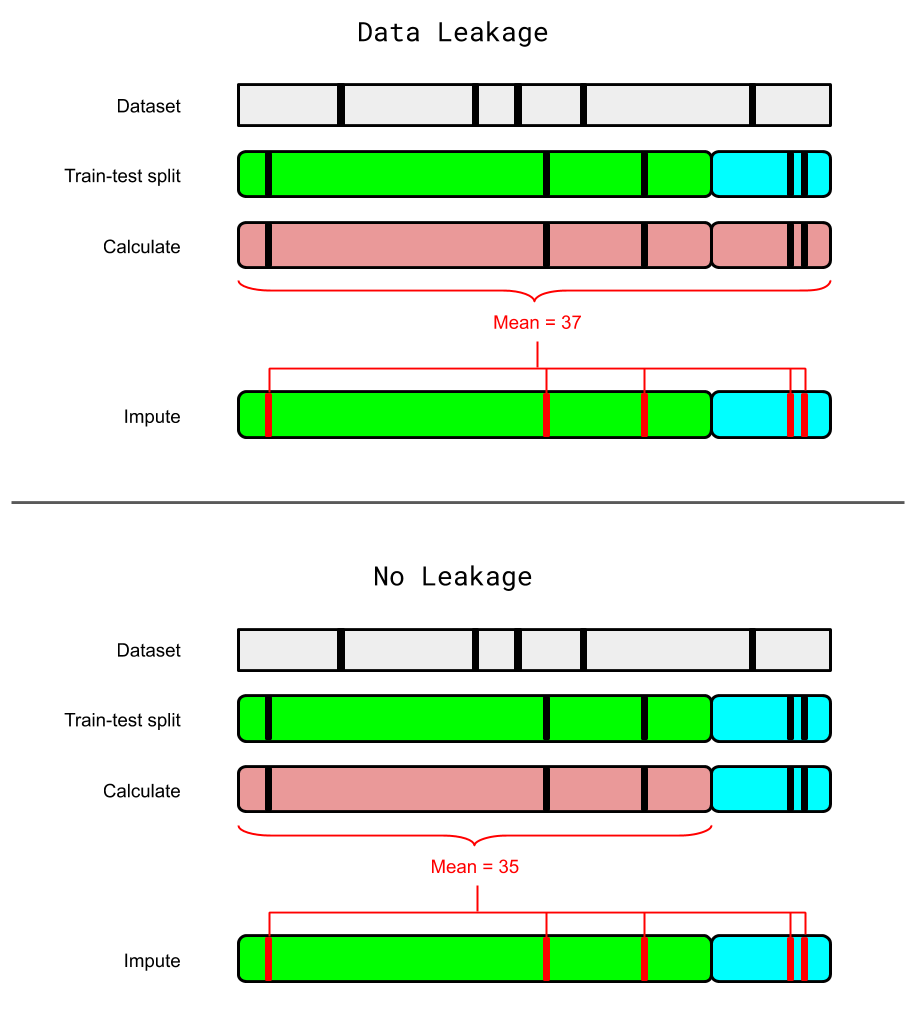

In [3]:
#Menghindari kebocoran data, intinya jangan pernah fit ke data tes, dibawah ini terlihat mana data yang bocor dan tidak bocor
illustration.data_leakage
#fit hanya untuk data train dan transform baru data test dan train

# Train-val-test split

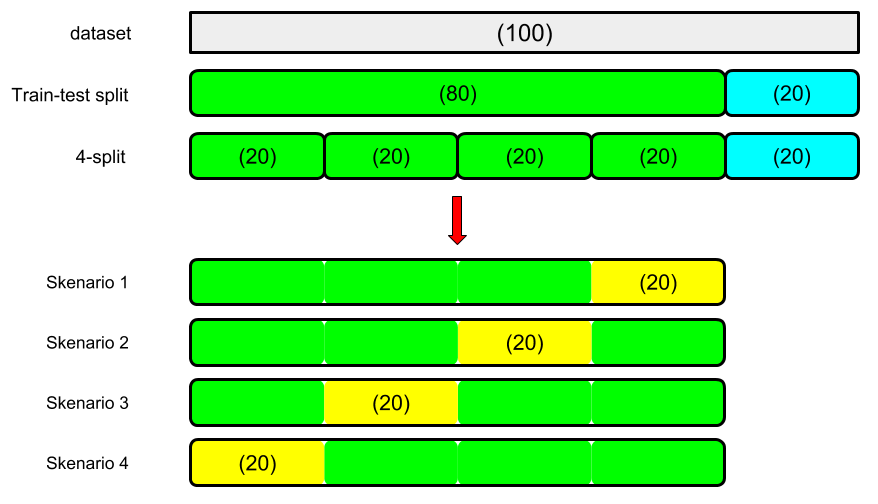

In [4]:
illustration.train_val_test

# Siapkan data tanpa fillna dan get_dummies

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Age", "Cabin"], inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S
888,1,1,female,0,0,30.0000,S
889,0,3,female,1,2,23.4500,S


In [7]:
X = df.drop(columns="Survived")  
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Preprocessor

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [9]:
#membuat pipa pipline agar mengolah data dari yang sudah kita belajar di part 2 jadi mudah dan sekaligus

In [11]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
]) #pada numerikal pipa ini kita membuat imputer yaitu mengimpute data data yang kosang dengan isi rata-rata dan scalernya dengan minmax scaler

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())#pada kategorikal pipa ini kita membuat imputer yaitu mengimpute data data yang kosang dengan isi data yg frequency nya tinggi dan encode dengan one hot encoding
])


In [12]:
from sklearn.compose import ColumnTransformer

In [13]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
693,3,male,0,0,56.4958,S
482,2,male,0,0,0.0000,S
528,1,male,0,0,221.7792,S
856,3,female,0,1,9.3500,S
802,2,female,1,1,26.2500,S


In [14]:
#Membuat sebuah pipa besar baru untuk menampung pipa diatasnya
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["SibSp", "Parch", "Fare"]),
    ("categoric", categorical_pipeline, ["Pclass", "Sex", "Embarked" ])
])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("algoritma", KNeighborsClassifier())
])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                           

In [18]:
pipeline.score(X_test, y_test)

0.776536312849162

# GridSearch CV 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
#penjelasan ini di video 2-12 tuning dan cross validation
parameter = {
    "algoritma__n_neighbors": range(1, 51, 2), #1 sampai 51 lompat 2, berarti 1 - 49
    "algoritma__weights": ["uniform", "distance"],
    "algoritma__p": [1, 2] #mainhatten atau eucludian distance
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1) #cv atau cross validationnya 3 atau 5(basic),, njobs untuk memanfaatkan berapa core cpu kita, -1 artinya pakailah semua,, verbose untuk pas running ga kaya ngehang dan menampilkan report
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [27]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritma__n_neighbors,param_algoritma__p,param_algoritma__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035336,0.003091,0.036669,0.015110,1,1,uniform,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.764706,0.670886,0.725738,0.720443,0.038484,99
1,0.030002,0.000818,0.018002,0.002827,1,1,distance,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.764706,0.670886,0.725738,0.720443,0.038484,99
2,0.040333,0.007358,0.030335,0.003773,1,2,uniform,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.768908,0.670886,0.734177,0.724657,0.040579,97
3,0.031670,0.004189,0.018001,0.006378,1,2,distance,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.768908,0.670886,0.734177,0.724657,0.040579,97
4,0.025667,0.000470,0.030004,0.006379,3,1,uniform,"{'algoritma__n_neighbors': 3, 'algoritma__p': ...",0.789916,0.805907,0.755274,0.783699,0.021133,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.027668,0.005185,0.020001,0.002449,47,2,distance,"{'algoritma__n_neighbors': 47, 'algoritma__p':...",0.773109,0.772152,0.789030,0.778097,0.007740,52
96,0.032335,0.004497,0.033003,0.007120,49,1,uniform,"{'algoritma__n_neighbors': 49, 'algoritma__p':...",0.806723,0.818565,0.763713,0.796334,0.023568,33
97,0.031337,0.010371,0.020002,0.001633,49,1,distance,"{'algoritma__n_neighbors': 49, 'algoritma__p':...",0.773109,0.767932,0.789030,0.776690,0.008977,60
98,0.028000,0.002942,0.027334,0.001248,49,2,uniform,"{'algoritma__n_neighbors': 49, 'algoritma__p':...",0.802521,0.822785,0.759494,0.794933,0.026390,36


In [21]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritma__n_neighbors,param_algoritma__p,param_algoritma__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
36,0.031340,0.007715,0.042331,0.007766,19,1,uniform,"{'algoritma__n_neighbors': 19, 'algoritma__p':...",0.815126,0.818565,0.805907,0.813200,0.005344,1
28,0.030672,0.008015,0.059001,0.011434,15,1,uniform,"{'algoritma__n_neighbors': 15, 'algoritma__p':...",0.815126,0.810127,0.810127,0.811793,0.002357,2
40,0.026840,0.000636,0.037670,0.003093,21,1,uniform,"{'algoritma__n_neighbors': 21, 'algoritma__p':...",0.815126,0.818565,0.801688,0.811793,0.007282,2
54,0.038002,0.017683,0.041003,0.004900,27,2,uniform,"{'algoritma__n_neighbors': 27, 'algoritma__p':...",0.815126,0.827004,0.793249,0.811793,0.013981,2
38,0.041667,0.018659,0.044178,0.007334,19,2,uniform,"{'algoritma__n_neighbors': 19, 'algoritma__p':...",0.815126,0.814346,0.805907,0.811793,0.004174,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.029669,0.004497,0.015667,0.000944,3,1,distance,"{'algoritma__n_neighbors': 3, 'algoritma__p': ...",0.760504,0.734177,0.759494,0.751392,0.012179,95
3,0.044003,0.016271,0.018335,0.001247,1,2,distance,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.768908,0.670886,0.734177,0.724657,0.040579,97
2,0.041337,0.009286,0.041671,0.005313,1,2,uniform,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.768908,0.670886,0.734177,0.724657,0.040579,97
1,0.039669,0.001699,0.017001,0.002160,1,1,distance,"{'algoritma__n_neighbors': 1, 'algoritma__p': ...",0.764706,0.670886,0.725738,0.720443,0.038484,99


In [22]:
model.best_params_

{'algoritma__n_neighbors': 19,
 'algoritma__p': 1,
 'algoritma__weights': 'uniform'}

In [23]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8188202247191011, 0.7877094972067039)

# Prediction

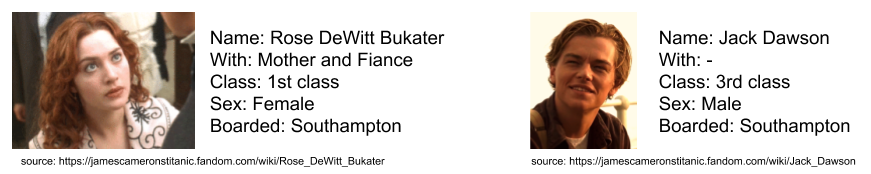

In [24]:
illustration.jack_and_rose

In [25]:
X.iloc[0:1]

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,male,1,0,7.25,S


In [26]:
data = [
    [1, "female", 1, 1, 80, "S"],
    [3, "male", 0, 0, 5, "S"]
]

X_pred = pd.DataFrame(data, index=["Rose", "Jack"], columns=X.columns)
X_pred

,Pclass,Sex,SibSp,Parch,Fare,Embarked
Rose,1,female,1,1,80,S
Jack,3,male,0,0,5,S


In [27]:
model.predict(X_pred)

array([1, 0], dtype=int64)

In [28]:
X_pred["Survived"] = model.predict(X_pred)
X_pred

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
Rose,1,female,1,1,80,S,1
Jack,3,male,0,0,5,S,0


# Save Model

In [38]:
from jcopml.utils import save_model

In [40]:
save_model(model, "knn_titanic.pkl")

Model is pickled as model/knn_titanic.pkl


In [41]:
save_model(model.best_estimator_, "knn_titanic_small.pkl") #jika hanya ingin menympan pipline terbaik

Model is pickled as model/knn_titanic_small.pkl


# load Model

In [42]:
from jcopml.utils import load_model

In [43]:
model_yang_diload = load_model("model/knn_titanic_small.pkl")

In [44]:
model_yang_diload.predict(X_pred)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([1, 0], dtype=int64)

# Optional (Picking Object in Python)

In [47]:
#cara save model dengan basic python
import pickle, os

In [48]:
os.makedirs("coba", exist_ok=True) #exist_ok=True jika sudah ada direktorinya yaudah diskip

In [49]:
pickle.dump(model, open("coba/knn.pkl", "wb")) #write binary yaitu ngesave objek yg binary
model = pickle.load(open("coba/knn.pkl", "rb")) #read binary yaitu load model